## Applications of Linear Transformations

### Computer graphics

Computer graphics essentially consist of a large number of basic geometric shapes such as triangles or quadrilaterals, defined by their vertexes (corners).  The ability to manipulate these shapes efficiently is a fundamental necessity in the field of computer graphics.  Linear transformations can be used to generate complex shapes from basic shapes through effects such as shearing and reflection, and can also be used to rotate and translate shapes in order to create a sequence of images needed for an animated scene.

The software responsible for rendering three-dimensional scenes in modern video games must process the coordinates of millions of vertexes in each frame of animation.  Typical hardware used for running the software will be able to generate around 60 frames per second.  In addition to the placement of vertexes in a scene, there are other computations required, such as those to provide color and shading, and then to project the three-dimensional scene onto the two-dimensional screen.  In this context, the efficiency of the algorithms, software, and hardware all play a major role in the quality of the end result.  

The use of matrix multiplication to manipulate coordinates for computer graphics has two primary advantages.  Matrix representations can be used to merge multiple transformations together into a single transformation.  For example, instead of applying a rotation followed by a scaling transformation, the two operations can easily be merged into a single operation by multiplying the associated matrices as we did earlier.  The other advantage to organizing the calculations into matrix multiplications is that dedicated hardware (graphics processing units) is designed specifically to handle these calculations in large numbers.

The construction of matrices to carry out rotations, reflections, and shears, has already been demonstrated in [Planar Transformations](Planar_Transformations.ipynb).  Here we show how to use matrix multiplication to carry out a translation, which is not a linear transformation.  

#### Translation

A **translation** is a transformation that moves all points an equal amount in the same direction.  Shown below is an example where all points are shifted (translated) three units to the right, and one unit up by a transformation $T:\mathbb{R}^2 \to \mathbb{R}^2$.  In the plot, we show several points which define a shape, and their corresponding images under the translation.  

In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

coords = np.array([[0,0],[0,3],[1,3],[1,1],[2,1],[2,0],[0,0]])
coords = coords.transpose()

x = coords[0,:]
y = coords[1,:]

## Compute translation by adding 3 to x coordinates and 1 to y coordinates
x_translated =  np.copy(x)
y_translated =  np.copy(y)

for i in range(x.shape[0]):
    x_translated[i] += 3
    y_translated[i] += 1

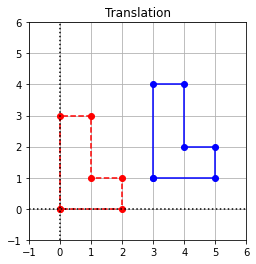

In [3]:
# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation");

Translation of coordinates is useful in computer graphics, but it is not a linear transformation.  In order to see why, we write a formula for the image of a vector $X$, and then verify that $T(X+Y) \neq T(X)+T(Y)$ for arbitrary vectors $X$ and $Y$.

$$
\begin{equation}
T(X) = X + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$


$$
\begin{equation}
T(X+Y) = (X + Y) + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$

$$
\begin{equation}
T(X) + T(Y) = X + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right] + Y + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
= (X + Y) + \left[ \begin{array}{r} 6 \\ 2 \end{array} \right]
\end{equation}
$$

The fact that $T$ is not linear implies that this transformation cannot be represented as a matrix multiplication in its current state.

Since the use of translations are necessary, a standard method has been developed to incorporate matrix multiplication and the associated advantages.  The method requires that we view $\mathbb{R}^2$ as a plane within $\mathbb{R}^3$.  We can then construct a linear transformation $L:\mathbb{R}^3\to\mathbb{R}^3$ which will have the *effect of the translation* within that plane.  We demonstrate the details for the transformation defined above.  

First, we associate the coordinates $(x_1,x_2)$ of a point in $\mathbb{R}^2$ with the coordinates $(x_1,x_2,1)$ of a point in $\mathbb{R}^3$ in the plane $x_3=1$.  These new coordinates are known as *homogeneous coordinates*.  We can then create a linear transformation $L:\mathbb{R}^3\to\mathbb{R}^3$ that represents a shear that is parallel to the $x_1x_2$-plane, and in the direction of the desired translation.  The effect of $L$ on points in the plane $x_3=1$ is a translation within the $x_3=1$ plane.  We define $L(X)=AX$, where $A$ is the following matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rrr} 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{array} \right]
\end{equation}
$$

Recall that the columns of $A$ are the images of the standard basis vectors $\{E_1, E_2, E_3\}$.  In this case $E_1$ and $E_2$ are unchanged, and $E_3$ is sheared in the desired direction.  We observe that $L$ has the intended effect.


$$
\begin{equation}
L(X) = AX = \left[ \begin{array}{rrr} 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{array} \right]
\left[ \begin{array}{r} x_1 \\ x_2 \\ 1 \end{array} \right] = 
\left[ \begin{array}{c} x_1+3 \\ x_2+1 \\ 1 \end{array} \right]
\end{equation}
$$

Finally, we associate with $L(X)$ the point in $\mathbb{R}^2$ that has coordinates $(x_1+3, x_2+1)$.

Let's have a look at the revised calculation with NumPy, that now makes use of the matrix multiplication.

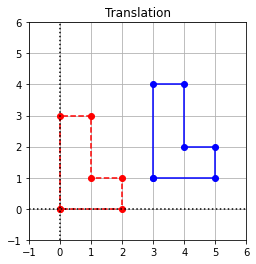

In [6]:
# Form a matrix of coordinates with rows x, y, 1
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))

# Define the matrix for the transfomation L
A = np.array([[1,0,3],[0,1,1],[0,0,1]])

## Compute translation by matrix multiplication
coords_translated = A@coords

## Slice off the first and second rows.  These are the coords of the translated points
x_translated = coords_translated[0,:]
y_translated = coords_translated[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation");

If we look closely at the computation, we realize that this way of computing the coordinates of the translated shape actually requires *more operations* than the first attempt where we stepped through the array and manipulated the coordinates directly.  The important point to remember however is that the ability to represent the translation as a matrix multiplication means that we can merge it with another operation, such as rotation, in order to carry out both operations by multiplying by a single matrix.

Translations of shapes in three dimensions can be done in a similar way by associating each set of coordinate $(x_1, x_2, x_3)$ in $\mathbb{R}^3$ with the point $(x_1, x_2, x_3, 1)$ in $\mathbb{R}^4$.

#### Exercises

**Exercise 1:** 

$(a)$ Find a single matrix that represents a transformation that has the effect of a reflection about the line $x_1=x_2$ followed by a shift four units to the left. 

In [ ]:
## Code solution here.

$(b)$ Apply the transformation to the shape defined by $\texttt{coords}$ and plot the results.

In [ ]:
## Code solution here.

**Exercise 2:** 

$(a)$ Find a single matrix that represents a rotation about the point $(1,2)$.  (*Hint:  Make use of a translation to bring the center of rotation to $(0,0)$*.)

In [4]:
## Code solution here.

$(b)$ Apply the transformation to the shape defined by $\texttt{coords}$ and plot the results.

In [ ]:
## Code solution here.

**Exercise 3:** 

$(a)$ Find a matrix that represents clockwise rotation of $180^\circ$ about the point $(1,1)$ followed by a shift $3$ units to the right.


In [ ]:
## Code solution here.

$(b)$  Apply the transformation to the shape defined by $\texttt{coords}$ and plot the results.

In [ ]:
## Code solution here.

**Exercise 4:** 

$(a)$ Find a single matrix that represents a transformation that has the effect of reflection about the $x_2$-axis followed by a shift $2$ units to the right and $2$ units up.

In [ ]:
## Code solution here.

$(b)$ Create a new matrix of coordinates, apply this transformation, and plot the results.

In [ ]:
## Code solution here.

### Discrete dynamical systems

As we saw in the previous chapter, it is often useful to describe a structure that has multiple components with a single vector.  If that structure is changing in time due to some process, it is typical to refer to the vector as a **state vector** since it describes the *state* of the structure at some particular time.  It is quite common to model such dynamic processes at discrete times and use linear transformations to model the evolution of the state vector from one time to the next.

Let's suppose that we aim to describe a sequence of vectors at times $t=0, 1, 2, 3,$... with state vectors $X_0$, $X_1$, $X_2$, $X_3$.... at those times.  We propose to calculate the state vector $X_t$ based only on the previous state vector $X_{t-1}$.  If we model the transition from $X_{t-1}$ to $X_t$ with a linear transformation, then there is a matrix such that $X_t = AX_{t-1}$.  This sort of model is known as a **discrete dynamical system** and is used in many areas from economics to biology.

#### Infectious Disease Model

In this example we consider a basic model of an infectious disease that is spreading within a population.  A well known family of models for this scenario is known as the $SIR$ models.  The acronym comes from a basic modeling assumption that the population is divided into three categories: Susceptible, Infectious, and Recovered.  As the disease spreads, a portion of the Susceptible individuals become Infectious, and a portion of Infectious individuals become Recovered.  We will consider a small variation in the model which assumes that a portion of Recovered individuals return to the Susceptible category.  This variation, known as an $SIRS$ model, would be a more accurate description of a disease which can be contracted multiple times.

We suppose that the population is completely homogeneous in all regards, so that all individuals in a given category have the same probabilities to move to the next category.

To model real-world epidemics, it is necessary to estimate some parameters that specify how quickly individuals move among the categories.  These parameters will be important in making any predictions with the model.  For our demonstration, we will create an example.  Let us suppose that our state vectors describe the population at time intervals of 1 week, and that every week, 5% of the Susceptible population becomes Infectious, and 20% of the Infectious population becomes Recovered.  We also suppose that 15% of the Recovered population again becomes Susceptible every week.

If we let $s_t$, $i_t$, and $r_t$ represent the percentage of the three categories of the population at time $t$, we can write equations based on the modeling assumptions that allows us to calculate the values based on $s_{t-1}$, $i_{t-1}$, and $r_{t-1}$

$$
\begin{eqnarray}
s_t & = & 0.95s_{t-1} \hspace{2cm} + 0.15r_{t-1} \\
i_t & = & 0.05s_{t-1}  + 0.80i_{t-1} \\
r_t & = & \hspace{2cm} 0.20i_{t-1} + 0.85r_{t-1} 
\end{eqnarray}
$$

Now we can define $X_t$ as the vector with components $s_t$, $i_t$, and $r_t$, so that the equations can be written using matrix multiplication.

$$
\begin{equation}
X_t = \left[ \begin{array}{r} s_t \\ i_t \\ r_t  \end{array}\right] =
\left[ \begin{array}{rrr} 0.95 & 0 & 0.15 \\ 0.05 & 0.80 & 0 \\ 0 & 0.20 & 0.85 \end{array}\right]
\left[ \begin{array}{r} s_{t-1} \\ i_{t-1} \\ r_{t-1}  \end{array}\right]=
AX_{t-1}
\end{equation}
$$

The linear transformation $L:\mathbb{R}^3 \to \mathbb{R}^3$ defined by this matrix multiplication maps the state of the 
population at time $t-1$, to the state of the population at time $t$.  For an example let's label the initial state vector $X_0$, and consider what happens if initially 5% of the population is infective, and the other 95% of the population is susceptible. 

$$
\begin{equation}
X_0 = \left[ \begin{array}{r} 0.95 \\ 0.05 \\ 0  \end{array}\right] 
\end{equation}
$$

We compute $X_1 = AX_0$.

In [4]:
import numpy as np
A = np.array([[0.95, 0, 0.15],[0.05,0.8,0],[0,0.2,0.85]])

## X at time 0
X_0 = np.array([[0.95],[0.05],[0]])

## Compute X at the next time
X_1 = A@X_0

print(X_1)

[[0.9025]
 [0.0875]
 [0.01  ]]


Applying the transformation again gives $X_2 = AX_1 = A^2X_0$, the state of the population at time $t=2$.  In general, $n$ repeated applications of the transformation yield $X_n = A^nX_0$, the state of the population $n$ weeks into the future.  Let's compute $X_{50}$ as an example.

In [5]:
## X at time 0
X = np.array([[0.95],[0.05],[0]])

for t in range(50):
    X = A@X
    
print(X)

[[0.63157999]
 [0.15789071]
 [0.2105293 ]]


In such models attention is typically focused on the ultimate behavior of the state vector.  We want to know if the composition of the population reaches an equilibrium, or continues to change.  If it reaches an equilibrium, can we calculate it directly, instead of applying the matrix multiplication a large number of times?  We will address these questions in Chapter 5, when we learn more about computing $A^n$ efficiently. 

#### Navigating webpages

Browsing webpages can also be modeled using a discrete dynamical system.  In this model, the entries of the state vector $X_t$, represent the probability that the browser is on a particular page at time $t$.  Advancing in time represents the browser moving from one page to another.  Many pages contain links to other pages.  The model assumes that the browser is more likely to follow a link to a new page rather than navigating to a new unlinked page.  The goal is to build a linear transformation $L$, defined by a matrix multiplication, which maps the vector of probabilities at time $t-1$ to the vector of probabilities at time $t$ based on the link structure of the pages.  Such a model was the foundation of the PageRank algorithm, which is the basis of Google's very successful search engine.

To build the required matrix $A$, the entries $a_{ij}$ are set to the probability that the browser navigates to page $i$ from page $j$.  For fixed column $j$, the entries represent a  probability distribution that describes location of the browser at the next step.  The entries in each column therefore must add to one.  Let's make some additional assumptions to complete the model.   

- The browser follows a link with probability 0.8.
- All links on a page are equally likely to be followed.
- A browser not following a link is equally likely to reach any new page at the next step.
- The browser always changes pages at each step

These assumptions completely define the matrix.  If we let $n$ be the number of webpages in the model, $A$ will be an $n\times n$ matrix with zeros on its main diagonal due to the last assumption.  If we focus on a particular page $j$, There are a total of $n-1$ nonzero entries since $a_{jj} = 0$.  If page $j$ has links to $k$ different pages, then $a_{ij} = 0.8/k + 0.2/(n-1)$ if $i$ is the index of one of the linked pages, and $a_{ij} = 0.2/(n-1)$ if $i$ is the index of one of the unlinked pages.

Here is an example of what such a matrix would look like with $n=5$, page 1 linking to pages 2 and 5, page 2 linking to page 5, page 3 linking to page 2, page 4 linking to pages 1 and 2, and page 5 linking to all other pages.

$$
\begin{equation}
\left[ \begin{array}{ccccc} 
0 & 0.05 & 0.05 & 0.45 & 0.25 \\ 
0.45 & 0 & 0.85 & 0.45 & 0.25  \\
0.05 & 0.05 & 0 & 0.05 & 0.25  \\
0.05 & 0.05 & 0.05 & 0 & 0.25  \\
0.45 & 0.85 & 0.05 & 0.05 & 0  \\
\end{array}\right]
\end{equation}
$$

To complete the model example, we specify $X_0$.  In this case the interpretation is easiest if we take $X_0$ to be a vector with a single entry equal to one, and all other entries equal to zero.  For example, the following choice of $X_0$ means that the browser starts the navigation at page 4.

$$
\begin{equation}
X_0 = \left[ \begin{array}{ccccc} 0 \\ 0 \\ 0 \\ 1 \\ 0
\end{array}\right]
\end{equation}
$$

Applying the transformation once gives $X_1 = AX_0$ which gives a vector that contains the probabilities that the browser is at each of the pages.

In [21]:
A = np.array([[0,0.05,0.05,0.45,0.25],
              [0.45,0,0.85,0.45,0.25],
              [0.05,0.05,0,0.05,0.25],
              [0.05,0.05,0.05,0,0.25],
              [0.45,0.85,0.05,0.05,0]])
X_0 = np.array([[0],[0],[0],[1],[0]])
X_1 = A@X_0
print(X_1)

[[0.45]
 [0.45]
 [0.05]
 [0.  ]
 [0.05]]


Applying the transformation $n$ times gives $X_n$, the vector that contains the probabilities of the browser being at each of the pages after $n$ steps of navigation.

In [25]:
X = np.array([[0],[0],[0],[1],[0]])

for t in range(20):
    X = A@X
    
print(X)

[[0.15277035]
 [0.29525499]
 [0.11062482]
 [0.11062482]
 [0.33072501]]


As with the population model, the interest lies in predicting the probabilities in $X_n$ when $n$ is large, and thus determining what pages a browser is more likely to visit after this sort of random navigation.

#### Exercises

**Exercise 1:**  The webpages and their links are an example of a [directed graph](Applications.ipynb) as discussed in an earlier chapter.  An adjacency matrix therefore could be used to conveniently describe the link structure among the pages.  The matrix used in the web navigation model could then be constructed from the adjacency matrix.  Write a Python function that accepts an adjacency matrix for a direct graph, and returns the matrix required for the corresponding web navigation model.  Test your function on the following adjacency matrix defined in the cell below.

In [11]:
A = np.array([[0,0,0,1,0,1,1,0,0,1],
              [0,0,1,0,0,0,1,1,0,0],
              [1,1,0,1,0,1,1,0,0,1],
              [0,1,0,0,0,0,1,0,0,1],
              [0,0,0,1,0,0,1,0,0,0],
              [1,1,0,1,0,0,1,0,0,1],
              [0,0,0,1,0,1,0,0,0,0],
              [0,1,0,1,0,1,1,0,0,1],
              [0,1,1,1,0,1,0,1,0,0],
              [1,0,1,1,0,0,1,1,0,0],
             ])

In [ ]:
## Code solution here.

**Exercise 2:** There are a total of $4$ webpages in a web navigation model where page $1$ links to all other pages, page $2$ links to page $1$, page $3$ links to page $2$, page $4$ links to page $2$ and $3$. Create an adjacency matrix that describes the above link structure among the four pages. Use the Python function defined in the previous question to get the corresponding matrix used in the web navigation model. Given that  the browser starts the navigation at page $2$, predict the probability of browser vising each of the four pages after some large number of steps of navigation. Use your results to determine which page is most likely to be visited by the browser.

In [ ]:
## Code solution here.

### References

- Allen, Linda J.S. *Some Discrete SI, SIR, and SIS epidemic models*., Mathematical Biosciences, Vol 124, No. 1, Nov. 1994, pp. 83-105.

- Kwak, Jin Ho and Sungpyo Hong.  *Linear Algebra*. 2nd ed., Birkhauser., 2004.

- Lay, David, et al. *Linear Algebra and its Applications*. 5th ed., Pearson., 2016

- Leon, Steven J. *Linear Algebra with Applications*. 9th ed., Pearson., 2015

- John Vince. *Mathematics for Computer Graphics*. 3rd ed., Springer., 2010 